In [1]:
run = 'E1154'

In [2]:
from lsst.daf.butler import Butler
import pylab
import traceback
butler = Butler('embargo_new', collections=['LSSTCam/raw/all', 'LSSTCam/calib/unbounded'])

In [3]:
sensor="R01_S11"
detector=list(butler.registry.queryDimensionRecords("detector",instrument='LSSTCam',where=f"detector.full_name='{sensor}'"))[0].id
detector

4

In [4]:
collections=butler.registry.queryCollections(f'*/ptc*{run}*')

In [5]:
exposures = list(butler.registry.queryDimensionRecords("exposure", 
                    where=f"exposure.science_program='{run}' and instrument='LSSTCam' and exposure.observation_reason='flat' and exposure.observation_type='flat'"))

 60%|██████    | 497/827 [00:15<00:10, 32.28it/s]Traceback (most recent call last):
  File "/tmp/ipykernel_30278/1385991115.py", line 3, in <module>
    photodiode = butler.get('photodiode', collections=collections,detector=detector, exposure=anexposure.id)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/gb419f0f6c8+f2441805f1/python/lsst/daf/butler/direct_butler/_direct_butler.py", line 1162, in get
    ref = self._findDatasetRef(
          ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/gb419f0f6c8+f2441805f1/python/lsst/daf/butler/direct_butler/_direct_butler.py", line 916, in _findDatasetRef
    raise DatasetNotFoundError(
lsst.daf.butler._exceptions.DatasetNotFoundError: Dataset photodiode with data ID {instrument: 'LSSTCam', exposure: 2024093000895} could not be 

2024093000895


100%|██████████| 827/827 [00:25<00:00, 32.26it/s]


Text(0, 0.5, 'CURRENT')

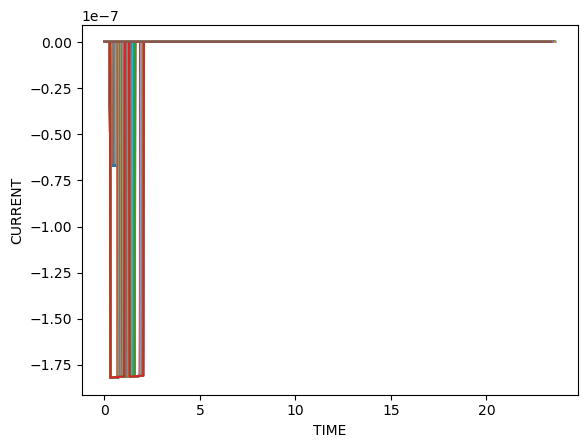

In [6]:
for anexposure in list(exposures)[::]:
    try:
        photodiode = butler.get('photodiode', collections=collections,detector=detector, exposure=anexposure.id)
        table = photodiode.toTable()[0]
        pylab.plot(table['TIME'].T, table['CURRENT'].T,"-")     ### I think there is a bug in to_Table
    except:
        print(anexposure.id)
        traceback.print_exc()
pylab.xlabel('TIME')
pylab.ylabel('CURRENT')

 60%|██████    | 497/827 [00:12<00:08, 40.37it/s]Traceback (most recent call last):
  File "/tmp/ipykernel_30278/1874540124.py", line 3, in <module>
    photodiode = butler.get('photodiode', collections=collections, detector=detector, exposure=anexposure.id)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/gb419f0f6c8+f2441805f1/python/lsst/daf/butler/direct_butler/_direct_butler.py", line 1162, in get
    ref = self._findDatasetRef(
          ^^^^^^^^^^^^^^^^^^^^^
  File "/opt/lsst/software/stack/conda/envs/lsst-scipipe-9.0.0/share/eups/Linux64/daf_butler/gb419f0f6c8+f2441805f1/python/lsst/daf/butler/direct_butler/_direct_butler.py", line 916, in _findDatasetRef
    raise DatasetNotFoundError(
lsst.daf.butler._exceptions.DatasetNotFoundError: Dataset photodiode with data ID {instrument: 'LSSTCam', exposure: 2024093000895} could not b

Text(0, 0.5, 'INTEGRATED CURRENT')

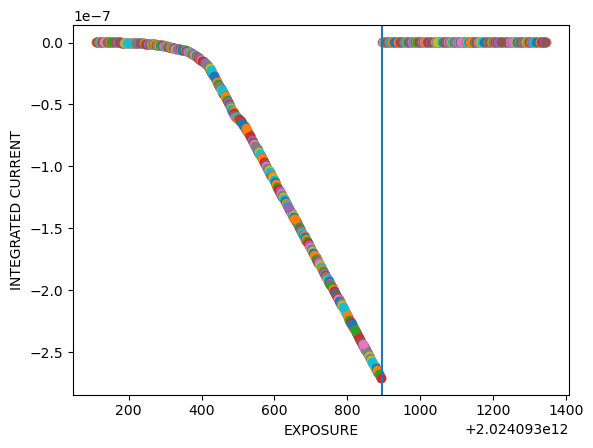

In [7]:
for anexposure in list(exposures)[::]:
    try:
        photodiode = butler.get('photodiode', collections=collections, detector=detector, exposure=anexposure.id)
        table = photodiode.toTable()[0]
        pylab.scatter( photodiode.getMetadata()['EXPOSURE'], photodiode.integrate() )
    except:
        pylab.axvline(anexposure.id)
        traceback.print_exc()
pylab.xlabel('EXPOSURE')
pylab.ylabel('INTEGRATED CURRENT')